# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [2]:
# !pip install --upgrade sagemaker

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached sagemaker-2.126.0-py2.py3-none-any.whl
  Using cached importlib_metadata-4.13.0-py3-none-any.whl (23 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 47.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.1.0
    Uninstalling importlib-metadata-5.1.0:
      Successfully uninstalled importlib-metadata-5.1.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.29.24
    Uninstalling botocore-1.29.24:
      Successfully uninstalled botocore-1.29.24
  Attempting uninstall: boto3
    Found existing installation: boto3 1.26.24
    Uninstalling boto3-1.26.24:
      Successfully uninstalled boto3-1.26.24
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.120.0
    Uninstalling sagemaker-2.120.0:

In [2]:
%conda install -c esri pycocotools

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pycocotools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2022.12.7          |   py37h06a4308_0         150 KB
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgomp-11.2.0             |       h1234567_1         474 KB
    libstdcxx-ng-11.2.0        |       h1234567_1         4.7 MB
    pycocotools-2.0.2          |   py37h04863e7_1         113 KB  esri
    ------------------------------------------------------------
                                           Total:        10.9 MB

The following NEW packages will be INSTALLED:

  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu None
  libgomp          

In [ ]:
%conda install scikit-image --y

In [2]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()
print(role)

sess = sagemaker.Session()
bucket = sess.default_bucket()
prefix = "ic-multilabel"

print("using bucket %s" % bucket)

arn:aws:iam::276167772046:role/service-role/AmazonSageMaker-ExecutionRole-20221211T202402
using bucket sagemaker-us-east-2-276167772046


In [8]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
sys.path.append('/home/sagemaker-user')
sys.path.append('/home/sagemaker-user/coco')
sys.path.append('/home/sagemaker-user')
sys.path.append('~')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
# dataDir = '/opt/cocoapi' # udacity
dataDir = '../../coco' # aws sagemaker
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)
# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

../../coco/annotations/instances_val2014.json
loading annotations into memory...
Done (t=6.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000560908.jpg


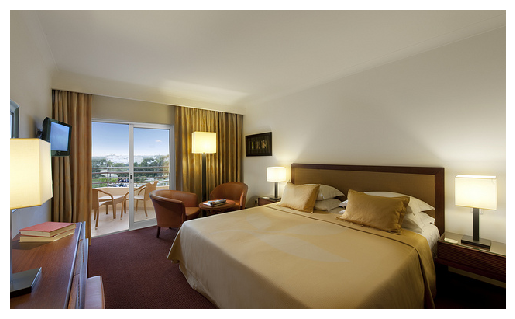

A hotel room scene with a double bed and a view of the patio.
A very big room with a big bed and some windows.
A really nice hotel room with a gorgeous view.
A suite with a large bed and balcony view
A nice clean bedroom with a great view


In [9]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)